<a href="https://colab.research.google.com/github/adalves-ufabc/2023.Q1-PLN/blob/main/2023_Q1_PLN_Notebook_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q1]**
Prof. Alexandre Donizeti Alves

## **Modelagem de T√≥picos com BERTopic**
---



<img src="https://raw.githubusercontent.com/MaartenGr/BERTopic/master/images/logo.png" width="40%">

**BERTopic** √© um algoritmo de modelagem de t√≥picos baseado em `transformers` que utiliza a t√©cnica de clusteriza√ß√£o de `embedding` para agrupar t√≥picos semelhantes. Ele se baseia em pr√©-treinamentos em larga escala em uma grande variedade de tarefas de linguagem natural para gerar representa√ß√µes de texto em um espa√ßo vetorial de alta dimens√£o, permitindo uma melhor captura de nuances sem√¢nticas e sint√°ticas. Com isso, o BERTopic se destaca por sua alta efici√™ncia e precis√£o na identifica√ß√£o de t√≥picos em grandes volumes de texto.

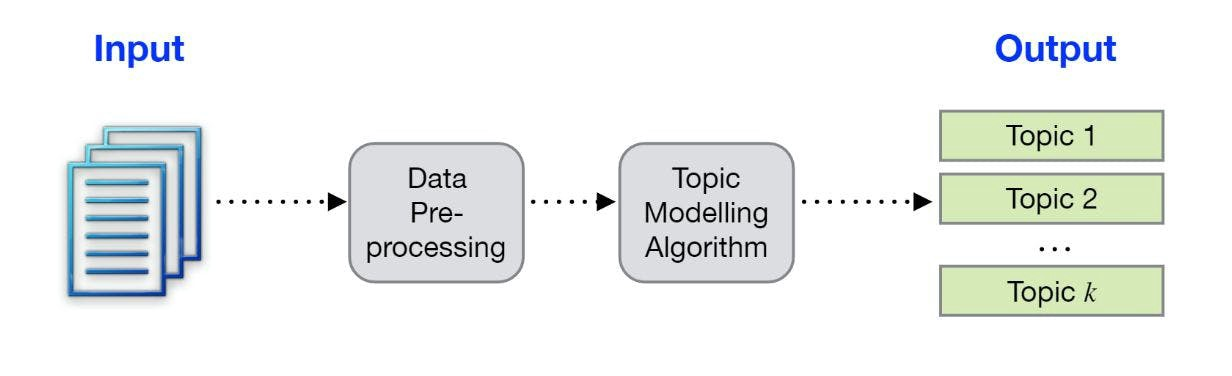

**Transformers** s√£o modelos de linguagem baseados em redes neurais que usam a t√©cnica de autoatenc√£o para aprender representa√ß√µes de palavras e senten√ßas em um corpus. A arquitetura dos `transformers` permite uma an√°lise de contexto mais ampla do que outras arquiteturas de rede neural, o que os torna particularmente adequados para tarefas de PLN, como tradu√ß√£o autom√°tica, sumariza√ß√£o de texto e resposta a perguntas. Alguns dos modelos de linguagem mais conhecidos e amplamente usados, como o GPT (*Generative Pre-trained Transformer*) e o BERT (*Bidirectional Encoder Representations from Transformers*), s√£o baseados em `transformers`.

**Embedding** (ou "vetoriza√ß√£o") √© uma t√©cnica usada em PLN para representar palavras ou frases como vetores num√©ricos densos, que podem ser manipulados matematicamente e usados como entrada para modelos de aprendizado de m√°quina. Cada palavra √© representada por um vetor de valores num√©ricos em um espa√ßo multidimensional, onde palavras semanticamente semelhantes s√£o colocadas pr√≥ximas umas das outras. O objetivo do `embedding` √© capturar a rela√ß√£o sem√¢ntica e contextual entre as palavras e frases, para que possam ser usadas em tarefas de PLN, como classifica√ß√£o de texto, an√°lise de sentimento, tradu√ß√£o autom√°tica, entre outras. O BERT √© um modelo de `embedding` pr√©-treinado de grande escala desenvolvido pelo Google que se tornou muito popular na comunidade de PLN.

**Olimp√≠ada de T√≥quio 2020**

Neste exemplo usaremos tweets da Olimp√≠ada de T√≥quio 2020 com o objetivo de criar um modelo que possa categorizar automaticamente os tweets por seus t√≥picos.

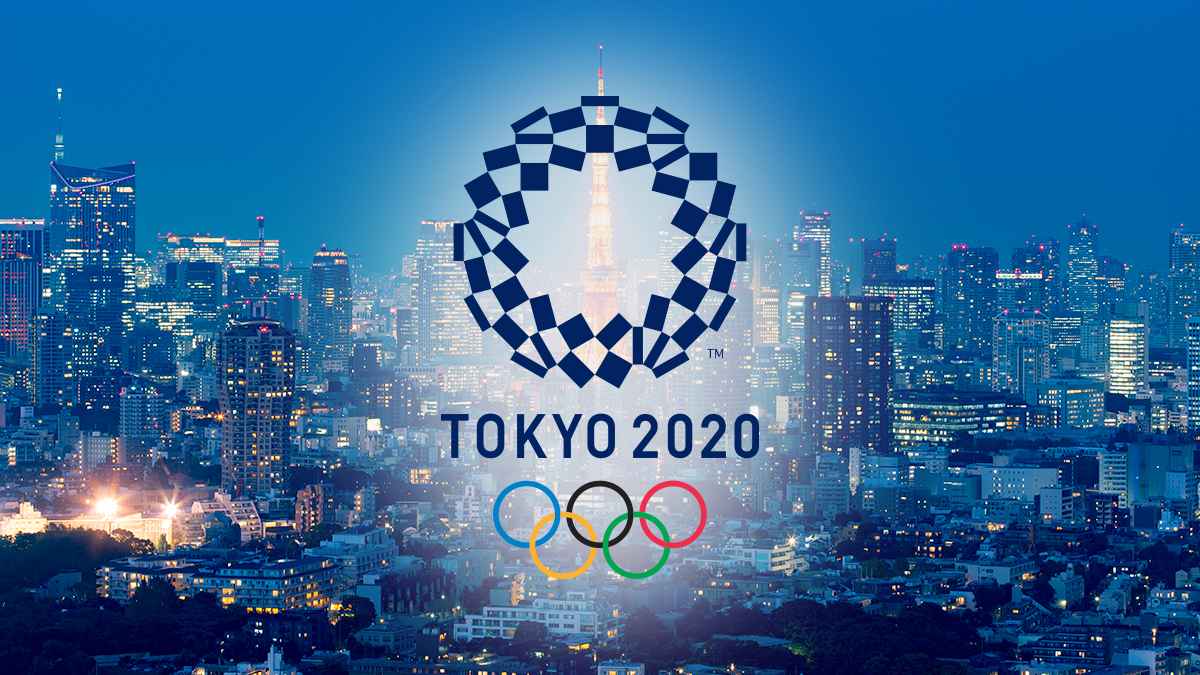

Inicialmente, √© necess√°rio instalar a biblioteca `bertopic`:

In [24]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


O conjunto de dados est√° dispon√≠vel em:
> https://www.kaggle.com/datasets/gpreda/tokyo-olympics-2020-tweets?ref=hackernoon.com

In [25]:
import pandas as pd 
 
df = pd.read_csv("/content/tokyo_2020_tweets.csv", engine='python')
df

id                        user_name  \
0       1418888645105356803               Abhishek Srivastav   
1       1418888377680678918         Saikhom Mirabai ChannuüáÆüá≥   
2       1418888260886073345                     Big Breaking   
3       1418888172864299008  International Hockey Federation   
4       1418886894478270464                     Cameron Hart   
...                     ...                              ...   
160543  1419947001102405633                     Belgian Cats   
160544  1419946996895346689                        IOC MEDIA   
160545  1419946993909047299                     Devin Heroux   
160546  1419946992948576256            ‚ìÇÔ∏èùêöùê¨ùêö üçä ùêåùê´.ùêÇùê°ùê¢ùê•ùêùùê´ùêûùêß üåè   
160547  1419946985214431232            Oigetit Breaking News   

                user_location  \
0                Udupi, India   
1              Manipur, India   
2                      Global   
3                    Lausanne   
4                   Australia   
...                       ...   
160543               Brussels   
160544  Lausanne. Switzerland   
160545       Toronto, Ontario   
160546                     Êù±‰∫¨   
160547      San Francisco, CA   

                                         user_description  \
0                    Trying to be mediocre in many things   
1           Indian weightlifter 48 kg category. ChampionüèÜ   
2       All breaking news related to Financial Market....   
3       Official International Hockey Federation Twitt...   
4                                 Football & Tennis Coach   
...                                                   ...   
160543     The Belgian National Team - Women's basketball   
160544  Keep updated with all the latest news from the...   
160545  CBC News/Olympics Reporter. Based in Toronto. ...   
160546  üóºùëáùëúùëòùë¶ùëú ùêΩùê¥ùëÉùê¥ùëÅ üáØüáµ ‚úÇÔ∏é Ë°®ÂèÇÈÅì ‚≠êÔ∏é ÂéüÂÆø ‚úÇÔ∏é ùêªùëéùëñùëü ùë†ùë°ùë¶ùëôùëñùë†ùë° ‚úÇ...   
160547  Powered by AI fake news filtering technology, ...   

               user_created user_followers user_friends user_favourites  \
0       2021-02-01 06:33:51             45           39             293   
1       2018-04-07 10:10:22           5235            5            2969   
2       2021-05-29 08:51:25           3646            3               5   
3       2010-10-20 10:45:59         103975         2724           36554   
4       2020-10-31 08:46:17              6           37              31   
...                     ...            ...          ...             ...   
160543  2010-05-11 10:28:27           5296          161             973   
160544  2011-01-05 10:00:39         147657          712             624   
160545  2009-03-24 22:53:21          44209         2317          153144   
160546  2015-12-31 02:13:03            149          245           12208   
160547  2020-06-10 01:19:55            343          273            1360   

       user_verified                 date  \
0              False  2021-07-24 10:59:49   
1              False  2021-07-24 10:58:45   
2              False  2021-07-24 10:58:17   
3               True  2021-07-24 10:57:56   
4              False  2021-07-24 10:52:51   
...              ...                  ...   
160543         False  2021-07-27 09:05:21   
160544          True  2021-07-27 09:05:20   
160545          True  2021-07-27 09:05:19   
160546         False  2021-07-27 09:05:19   
160547         False  2021-07-27 09:05:17   

                                                     text  \
0                         Let the party begin\n#Tokyo2020   
1       Congratulations #Tokyo2020 https://t.co/8OFKMs...   
2       Big Breaking Now \n\nTokyo Olympic Update \n\n...   
3       Q4: üá¨üáß3-1üáøüá¶\n\nGreat Britain finally find a wa...   
4       All I can think of every time I watch the ring...   
...                                                   ...   
160543  It's a close contest in our first Olympic game...   
160544  10 athletes from t

In [26]:
# Usaremos apenas 5000 tweets 
df = df[0:5000]

Come√ßamos instanciando o BERTopic. Definimos o idioma para ingl√™s, pois nossos documentos est√£o no idioma ingl√™s. Se voc√™ quiser usar um modelo multil√≠ngue, use `language="multilingual"` em vez disso.

Tamb√©m calcularemos as probabilidades do t√≥pico. No entanto, isso pode diminuir significativamente o BERTopic em grandes quantidades de dados (> 100_000 documentos). √â aconselh√°vel desativ√°-lo se voc√™ quiser acelerar o modelo.

**NOTA**: Utilize `language="multilingual"` para selecionar um modelo que suporte mais de 50 idiomas.

In [27]:
from bertopic import BERTopic

# Criando o modelo
model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Convertendo para uma lista 
docs = df.text.to_list()

# Ajustando o modelo aos dados 
topics, probabilities = model.fit_transform(docs)

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

2023-04-06 14:13:30,336 - BERTopic - Transformed documents to Embeddings
2023-04-06 14:13:43,118 - BERTopic - Reduced dimensionality
2023-04-06 14:13:45,324 - BERTopic - Clustered reduced embeddings


Depois de ajustar nosso modelo, podemos come√ßar a analisar os resultados. Normalmente, examinamos primeiro os t√≥picos mais frequentes, pois eles representam melhor a cole√ß√£o de documentos.

In [28]:
freq = model.get_topic_info()
freq

Topic  Count                                      Name
0      -1   1545                   -1_the_tokyo2020_to_and
1       0    210            0_vikas_boxing_krishan_okazawa
2       1    205  1_olympics_sports_olympicgames_tokyo2020
3       2    166              2_tokyo2020_lets_this_grande
4       3    153     3_puneethrajkumar_hearty_lifting_49kg
..    ...    ...                                       ...
86     85     11   85_potential_term_roadmap_realgoldeninu
87     86     11   86_dreams_dedicat_reality_determination
88     87     11                 87_jobs_ngo_vacancy_daily
89     88     10                  88_swevaus_var_55_market
90     89     10           89_adam_peaty_pool_breaststroke

[91 rows x 3 columns]

**NOTA**: O t√≥pico -1 √© o maior e refere-se a tweets discrepantes que n√£o atribuem a nenhum t√≥pico gerado. Neste caso, vamos ignorar o t√≥pico -1.

In [31]:
# Obtendo os 5 t√≥picos mais frequentes
freq.head(5)

Topic  Count                                      Name
0     -1   1545                   -1_the_tokyo2020_to_and
1      0    210            0_vikas_boxing_krishan_okazawa
2      1    205  1_olympics_sports_olympicgames_tokyo2020
3      2    166              2_tokyo2020_lets_this_grande
4      3    153     3_puneethrajkumar_hearty_lifting_49kg

In [32]:
# Obtendo os 5 t√≥picos menos frequentes
freq.tail(5)

Topic  Count                                     Name
86     85     11  85_potential_term_roadmap_realgoldeninu
87     86     11  86_dreams_dedicat_reality_determination
88     87     11                87_jobs_ngo_vacancy_daily
89     88     10                 88_swevaus_var_55_market
90     89     10          89_adam_peaty_pool_breaststroke

In [33]:
# Obtendo o n√∫mero de t√≥picos
topic_freq = model.get_topic_freq()

print("O modelo BERTopic tem", len(topic_freq), "t√≥picos.")

O modelo BERTopic tem 91 t√≥picos.


In [34]:
topic_freq

Topic  Count
0      -1   1545
1       0    210
2       1    205
3       2    166
4       3    153
..    ...    ...
86     85     11
87     86     11
88     87     11
89     88     10
90     89     10

[91 rows x 2 columns]

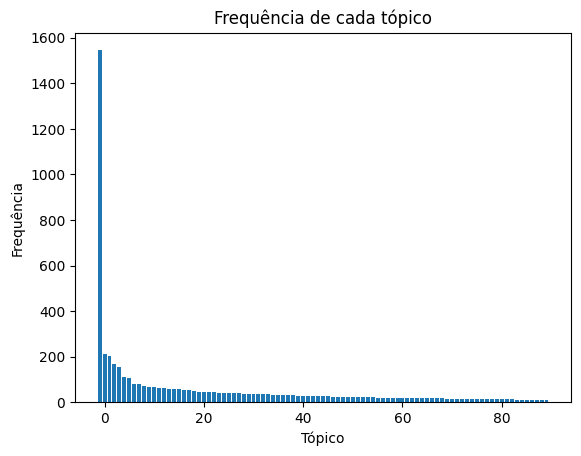

In [38]:
import matplotlib.pyplot as plt

# Obtendo a frequ√™ncia de cada t√≥pico
topic_freq = model.get_topic_freq()

# Removendo a primeira frequ√™ncia de t√≥pico
#topic_freq = topic_freq.drop(0).reset_index(drop=True)

# Plotando um gr√°fico de barras com a frequ√™ncia de cada t√≥pico
plt.bar(x=topic_freq['Topic'], height=topic_freq['Count'])
plt.title('Frequ√™ncia de cada t√≥pico')
plt.xlabel('T√≥pico')
plt.ylabel('Frequ√™ncia')
plt.show()

**NOTA**: BERTopic √© estoc√°stico, o que significa que os t√≥picos podem diferir entre as execu√ß√µes. "Estoc√°stico" √© um termo que se refere a um processo ou modelo que envolve algum elemento de aleatoriedade ou incerteza.

Voc√™ pode selecionar um t√≥pico espec√≠fico e obter as n principais palavras para esse t√≥pico e suas pontua√ß√µes c-TF-IDF.

In [41]:
# selecione o t√≥pico mais frequente
model.get_topic(0)

[('vikas', 0.075265147025943),
 ('boxing', 0.07399219708702336),
 ('krishan', 0.0525512770279395),
 ('okazawa', 0.03651788862734727),
 ('round', 0.036316532912378706),
 ('loses', 0.030663720767457898),
 ('boxer', 0.02888191904360666),
 ('krishnan', 0.026071740861847503),
 ('welterweight', 0.02153198907543091),
 ('japanese', 0.021263197248292637)]

H√° v√°rias op√ß√µes de **visualiza√ß√£o** dispon√≠veis no BERTopic, nomeadamente a visualiza√ß√£o de t√≥picos, probabilidades e t√≥picos ao longo do tempo. A modelagem de t√≥picos √©, at√© certo ponto, bastante subjetiva. As visualiza√ß√µes ajudam a entender os t√≥picos que foram criados.

Depois de treinar nosso modelo BERTopic, podemos percorrer iterativamente talvez uma centena de t√≥picos para obter uma boa compreens√£o dos t√≥picos que foram extra√≠dos. No entanto, isso leva algum tempo e carece de uma representa√ß√£o global. Em vez disso, podemos visualizar os t√≥picos que foram gerados de forma muito semelhante ao LDAvis:

In [45]:
model.visualize_topics()

Ser√° gerada uma figura interativa que pode ser usada conforme indicado na anima√ß√£o acima. Cada c√≠rculo indica um t√≥pico e seu tamanho √© a frequ√™ncia do t√≥pico em todos os documentos.

In [46]:
model.visualize_topics(top_n_topics=5)

As probabilidades vari√°veis que s√£o retornadas de `transform()` ou `fit_transform()` podem ser usadas para entender o qu√£o confiante √© o BERTopic de que certos t√≥picos podem ser encontrados em um documento.

Para cada documento, tamb√©m podemos visualizar a probabilidade desse documento pertencer a cada t√≥pico poss√≠vel. Para fazer isso, usamos a vari√°vel probabilidades ap√≥s executar o BERTopic para entender o qu√£o confi√°vel o modelo √© para aquela inst√¢ncia.

Como h√° muitos t√≥picos para visualizar, visualizamos a distribui√ß√£o de probabilidade dos t√≥picos mais prov√°veis:

In [47]:
model.visualize_distribution(probabilities[1], min_probability=0.015)

Parece que para este documento, o modelo teve um pouco mais de dificuldade em escolher o t√≥pico correto, pois eram v√°rios t√≥picos muito semelhantes entre si.

Os t√≥picos que foram criados podem ser reduzidos hierarquicamente. Para entender a estrutura hier√°rquica potencial dos t√≥picos, podemos usar `scipy.cluster.hierarchy` para criar clusters e visualizar como eles se relacionam. Isso pode ajudar a selecionar um n√∫mero de t√≥picos apropriado ao reduzir o n√∫mero de t√≥picos que voc√™ criou.

In [49]:
model.visualize_hierarchy(top_n_topics=50)

Podemos visualizar os termos selecionados para alguns t√≥picos criando gr√°ficos de barras a partir das pontua√ß√µes de c-TF-IDF para cada representa√ß√£o de t√≥pico. Insights podem ser obtidos a partir das pontua√ß√µes relativas de c-TF-IDF entre e dentro dos t√≥picos. Al√©m disso, voc√™ pode facilmente comparar as representa√ß√µes de t√≥picos entre si.

In [52]:
model.visualize_barchart(top_n_topics=4)

Voc√™ tamb√©m pode visualizar como certos t√≥picos s√£o semelhantes entre si. Podemos criar uma matriz de similaridade simplesmente aplicando semelhan√ßas de cosseno por meio desses embeddings de t√≥picos. O resultado ser√° uma matriz indicando o qu√£o semelhantes certos t√≥picos s√£o entre si.

In [53]:
model.visualize_heatmap(width=1000, height=1000)

Os t√≥picos s√£o representados por um n√∫mero de palavras come√ßando com a melhor palavra representativa. Cada palavra √© representada por uma pontua√ß√£o c-TF-IDF. Quanto maior a pontua√ß√£o, mais representativa √© uma palavra para o t√≥pico. Como as palavras do t√≥pico s√£o classificadas por sua pontua√ß√£o c-TF-IDF, as pontua√ß√µes diminuem lentamente com cada palavra adicionada. Em algum momento, adicionar palavras √† representa√ß√£o do t√≥pico aumenta apenas marginalmente a pontua√ß√£o total do c-TF-IDF e n√£o seria ben√©fico para sua representa√ß√£o.

Para visualizar esse efeito, podemos plotar as pontua√ß√µes do c-TF-IDF para cada t√≥pico pela classifica√ß√£o do termo de cada palavra. Em outras palavras, a posi√ß√£o das palavras (classifica√ß√£o do termo), onde as palavras com maior pontua√ß√£o c-TF-IDF ter√£o uma classifica√ß√£o de 1, ser√° colocada no eixo x. Considerando que o eixo y ser√° preenchido pelas pontua√ß√µes c-TF-IDF. O resultado √© uma visualiza√ß√£o que mostra o decl√≠nio da pontua√ß√£o c-TF-IDF ao adicionar palavras √† representa√ß√£o do t√≥pico. Ele permite que voc√™, usando o m√©todo do cotovelo, selecione o melhor n√∫mero de palavras em um t√≥pico.

O m√©todo do Cotovelo ou m√©todo Elbow √© uma t√©cnica usada para encontrar a quantidade ideal de clusters *K*.

In [ ]:
model.visualize_term_rank()

Depois de treinar nosso modelo, podemos usar `find_topics` para pesquisar t√≥picos semelhantes a um termo de pesquisa de entrada. Aqui, vamos pesquisar t√≥picos que se relacionam intimamente com o termo de pesquisa "volleyball". Em seguida, extra√≠mos o t√≥pico mais semelhante e verificamos os resultados:

In [54]:
similar_topics, similarity = model.find_topics("volleyball", top_n=5); 
similar_topics

[62, 60, 1, 28, 22]

In [58]:
model.get_topic(62)

[('handball', 0.1962879389019968),
 ('egypt', 0.0767939069469039),
 ('esp', 0.07175230477141682),
 ('portugal', 0.07175230477141682),
 ('card', 0.04875304621319701),
 ('teams', 0.04688958089593823),
 ('ger', 0.043274540861670624),
 ('insane', 0.04223358316870178),
 ('fra', 0.04223358316870178),
 ('nor', 0.04007173249764982)]

Tamb√©m podemos reduzir o n√∫mero de t√≥picos depois de treinar um modelo BERTopic. A vantagem de fazer isso √© que voc√™ pode decidir o n√∫mero de t√≥picos depois de saber quantos s√£o realmente criados. √â dif√≠cil prever antes de treinar seu modelo quantos t√≥picos est√£o em seus documentos e quantos ser√£o extra√≠dos. Em vez disso, podemos decidir depois quantos t√≥picos parecem realistas.

In [59]:
model.reduce_topics(docs, nr_topics=5)

2023-04-06 14:30:02,936 - BERTopic - Reduced number of topics from 91 to 5


In [60]:
topics = model.topics_
probabilities = model.probabilities_

**Mais informa√ß√µes em:**

> https://github.com/MaartenGr/BERTopic